In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Find intersections

def findInter(array1,array2):
    
    intersecpart = np.argwhere(np.diff(np.sign(array1-array2)) != 0).reshape(-1) + 0
    
    return intersecpart


# Define the two equations given by Eq.8 in the report

def PtfixeFoncX(alphabar,alpha,phi,i,deltal,pirange,size = 10000.0):
    
    x = np.linspace(0,pirange*np.pi,size)
  
    
    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(x)):
        
        if np.absolute(np.cos(x[index-realindex])) < i/2.0:
            x = np.delete(x,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(x))
    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -2.0*alpha*x

    RHS = np.sin(x)*np.sqrt((o-(i**2.0)/(4.0*(np.cos(x)**2.0))))
    

    return LHS,RHS,x

# Define the equations given by Eq.9 in the report

def PtfixeFoncY(alphabar,alpha,phi,i,deltal,pirange,size=10000):
    
    
    y = np.linspace(0,pirange*np.pi,size)


    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    
        # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(y)):
        
        if np.absolute(np.sin(y[index-realindex])) < i/2.0:
            y = np.delete(y,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(y))
    
    
    decalage2 = np.pi*(np.arange(len(y))-(np.arange(len(y)))%(size/(pirange)))/(size/(pirange))
    
    
    signe = ((-1)**((decalage2/np.pi + 0.0001).astype(int)))

    alphaxterm = 2.0*alpha*(np.arccos((signe*i/(np.sin(y)*2.0)))+decalage2)
    
    #alphaxterm = 2.0*alpha*(np.arccos((i/(np.sin(y)*2.0))))

    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -alphaxterm 

    RHS = np.cos(y)*np.sqrt((o-(i**2.0)/(4.0*(np.sin(y)**2.0))))

    return LHS,RHS,y


def FindEigVect(ptFixeX,ptFixeY,eta,alpha):
    
    eingval = np.zeros((len(ptFixeY),4),dtype='complex')
    eingvect = np.zeros((len(ptFixeY)*4,4),dtype='complex')
    
    for pos in range(len(ptFixeX)):
        
        Jacobian = np.array([[0,0,1,0], 
                     [0,0,0,1],  
                     [-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos]) + 2.0*alpha), 
                                      np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]), -eta,0],
                     [np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]),-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos])), 0,-eta]])
        
        eingval[pos,:],eingvect[range(pos + 3*pos,pos + 3*pos +4 ),:] = np.linalg.eig(Jacobian)
        
    return eingvect,eingval

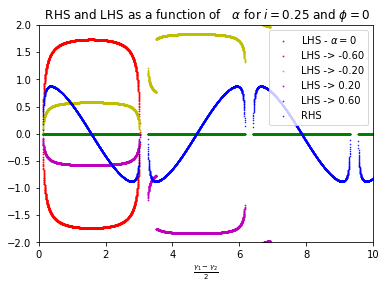

In [94]:
# Variables 

# i  = I/(2*I_01)   I_01 the critical current for both junctions

i = 0.5

#  phi  = phi_a/phi_0 with phi_0 the quantum flux

phi = 4

# alpha = phi_0/(I_01*L*2*PI),  L the total inductance 

alpha = 2

# alphabar = phi_0/(I_01*L)

alphabar = alpha*2*np.pi

# Omega  = sqrt(I_01*2*pi/(C_1*phi_0)) here C_1 is the capacitance for both junctions, we approcimate them to be the same
# we define tau = Omega*t

# eta = beta*2*np.sqrt(2*np.pi)/(I_01*C_1*phi_0) = beta*2*Omega/I_01. Here beta ( and thus eta) corresponds to loss.
# Since beta corresponds to a loss term and the rest is positive, eta is a positive constant.

eta = 0.5

# We define gamma_1 la phase pour la jonction 1 et gamma_2 la phase pour la deuxiéme jonction


# in function of i

phi = 4
alpha = 0.04
deltal = 0

plotnumber = 1


plt.figure(plotnumber)

phi = 0
i = 0.25
deltal = 0
size=10000
pirange = 5

LHS,RHS,x = PtfixeFoncY((alpha*2*np.pi),0,phi,i,deltal,pirange,size)


plotzero, = plt.plot(x,LHS,'g.',markersize=1.5,label=r"LHS - $\alpha = 0$")
#plot5, = plt.plot(x,RHS,'b.',markersize=1,label="RHS")


#i = np.linspace(1,5,5)/10.0

alpha = np.linspace(-60,60,4)/100

LHS,RHS,x = PtfixeFoncY((alpha[0]*2*np.pi),alpha[0],phi,i,deltal,pirange,size)

plot1, = plt.plot(x,LHS,'r.',markersize=1.5,label=r'LHS -> %.2f' % alpha[0])
    
LHS,RHS,x = PtfixeFoncY((alpha[1]*2*np.pi),alpha[1],phi,i,deltal,pirange,size)

plot2, = plt.plot(x,LHS,'y.',markersize=1.5,label=r'LHS -> %.2f' % alpha[1])
     
LHS,RHS,x = PtfixeFoncY((alpha[2]*2*np.pi),alpha[2],phi,i,deltal,pirange,size)

plot3, = plt.plot(x,LHS,'m.',markersize=1.5,label=r'LHS -> %.2f' % alpha[2],mfc = 'none')

LHS,RHS,x = PtfixeFoncY((alpha[3]*2*np.pi),alpha[3],phi,i,deltal,pirange,size)

plot4, = plt.plot(x,LHS,'r.',markersize=1.5,label=r'LHS -> %.2f' % alpha[3],mfc = 'none')


#for ipos in range(len(i)):
    
    #LHS,RHS,x = PtfixeFoncX((alpha*2*np.pi),alpha,phi,i[ipos],deltal,pirange,size)
    
    #plot5, = plt.plot(x,RHS,'b.',markersize=1,label="RHS")
    
    #plt.plot(x,LHS,'r.',markersize=1.5,label=r'RHS - %d' % i[ipos])
    

plot5, = plt.plot(x,RHS,'b.',markersize=1,label="RHS")
#plt.axis([0, x.max()+1 ,LHS.min()*(1+0.5),LHS.max()*(1+0.5)])
plt.axis([0,10,-2,2])
plt.title(' RHS and LHS as a function of' r'$\quad \alpha$ for $i = 0.25$ and $\phi = 0$')
plt.xlabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.legend(handles=[plotzero, plot1,plot2,plot3,plot4, plot5])
plt.savefig('InfunctionofI.pdf')
plt.show()


In [13]:
# Finding fixed points 

deltal  = 0
phi = 0 
eta = 0.2
i = 0.125

alpha = 0.1

def PtFixesXY(deltal,phi,i,alpha,pirange,size = 10000.0):

    LHS,RHS,x = PtfixeFoncX(alpha*2*np.pi,alpha,phi,i,deltal,pirange,size)
    
    # To take into account periodicity
    
    A = 1
    
    decalage = np.pi*(np.arange(len(x))-(np.arange(len(x)))%(size/(pirange*A)))/(size/(pirange*A))
    
    signe = ((-1)**((decalage/np.pi*1.0+ 0.0001).astype(int)))
    
    possibleY = np.arcsin(i/(-signe*2.0*np.cos(x)))+decalage
    possibleY = np.arcsin(i/(2.0*np.cos(x)))
    
    posPtfixe = findInter(LHS,RHS) 
    
    ptFixeX= x[posPtfixe]

    ptFixeY = possibleY[posPtfixe]
    
    return ptFixeX,ptFixeY

def PtFixesYX(deltal,phi,i,alpha,pirange,size = 10000.0):

    LHS,RHS,y = PtfixeFoncY(alpha*2*np.pi,alpha,phi,i,deltal,pirange,size)

    # To take into account periodicity
    
    A = 1
    
    decalage = np.pi*(np.arange(len(y))-(np.arange(len(y)))%(size/(pirange)))/(size/(pirange))
    
    signe = ((-1)**((decalage/np.pi*1.0+ 0.0001).astype(int)))
    
    possibleX = np.arccos(signe*i/(2.0*np.sin(y)))+decalage
    
    #possibleX = np.arccos(i/(2.0*np.sin(y)))
    
    
    posPtfixe = findInter(LHS,RHS) 
    
    ptFixeY= y[posPtfixe]

    ptFixeX = possibleX[posPtfixe]
    
    return ptFixeX,ptFixeY 


def solSysteme(deltal,phi,eta,i,alpha,pirange,size = 10000.0):

    # find the fixed points
    
    ptFixeX1,ptFixeY1 = PtFixesXY(deltal,phi,i,alpha,pirange,size)

    ptFixeX2,ptFixeY2 = PtFixesYX(deltal,phi,i,alpha,pirange,size)
    
    # find the eingenvalues and vectors
    
    eingvect1,eingvalue1 = FindEigVect(ptFixeX1,ptFixeY1,eta,alpha)
    eingvect2,eingvalue2 = FindEigVect(ptFixeX2,ptFixeY2,eta,alpha)
    
    
    
    return ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2
    

/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


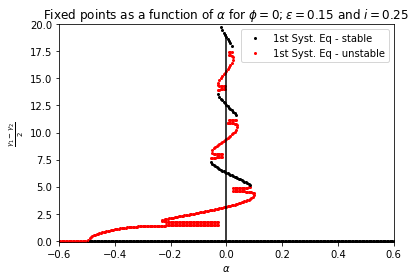

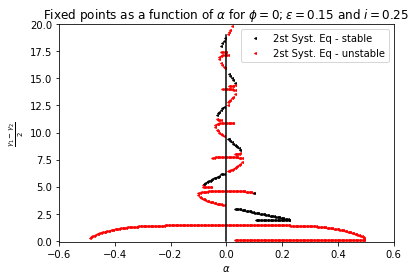

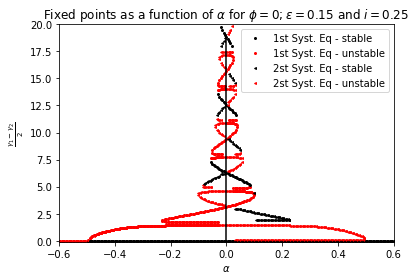

In [14]:
deltal  = 0
phi = 0 
eta = 0.15
i = 0.25

plt.figure(1)

for coef in range(0,280,1):

    alpha = coef/200.0 - 0.7
  
    ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha,12,size = 10000.0)
    
    for npointfixe in range(len(ptFixeX1)):
        if  max(eingvalue1[npointfixe,:]) < 0:
            plt.figure(1)
            plot1, =  plt.plot(alpha,ptFixeX1[npointfixe],'ko',markersize=2,label = r'1st Syst. Eq - stable')
            plt.figure(3)
            plot2, = plt.plot(alpha,ptFixeX1[npointfixe],'ko',markersize=2,label = r'1st Syst. Eq - stable')
        else:
            plt.figure(1)
            plot3, = plt.plot(alpha,ptFixeX1[npointfixe],'ro',markersize=2,label = r'1st Syst. Eq - unstable')
            plt.figure(3)
            plot4, = plt.plot(alpha,ptFixeX1[npointfixe],'ro',markersize=2,label = r'1st Syst. Eq - unstable')
    
    for npointfixe2 in range(len(ptFixeX2)):
        if  max(eingvalue2[npointfixe2,:]) < 0:
            plt.figure(2)
            plot5, = plt.plot(alpha,ptFixeX2[npointfixe2],'k<',markersize=2,label = r'2st Syst. Eq - stable')
            
            plt.figure(3)
            plot6, = plt.plot(alpha,ptFixeX2[npointfixe2],'k<',markersize=2,label = r'2st Syst. Eq - stable')
        else:
            plt.figure(2)
            plot7, = plt.plot(alpha,ptFixeX2[npointfixe2],'r<',markersize=2,label = r'2st Syst. Eq - unstable')

            
            plt.figure(3)
            plot8, = plt.plot(alpha,ptFixeX2[npointfixe2],'r<',markersize=2,label = r'2st Syst. Eq - unstable')

            
plt.figure(1)
plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\alpha$')
plt.axis([-0.6,0.6,-0.1,20])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\alpha$ for $\phi = 0; \varepsilon = 0.15$ and $ i = 0.25$')
plt.legend(handles=[plot1,plot3])
plt.savefig('xvsAlpha_test1_7.pdf')

plt.figure(2)
plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\alpha$')
plt.axis([-0.6,0.6,-0.1,20])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\alpha$ for $\phi = 0; \varepsilon = 0.15$ and $ i = 0.25$')
plt.legend(handles=[plot5,plot7])
plt.savefig('xvsAlpha_test2_7.pdf')


plt.figure(3)
plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\alpha$')
plt.axis([-0.6,0.6,-0.1,20])
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')
plt.title(r'Fixed points as a function of $\alpha$ for $\phi = 0; \varepsilon = 0.15$ and $ i = 0.25$')
plt.legend(handles=[plot2,plot4,plot6,plot8])
plt.savefig('xvsAlpha_test3_7.pdf')




plt.show()
    


/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in remainder
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in divide
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in divide
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in remainder
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in divide
/ho

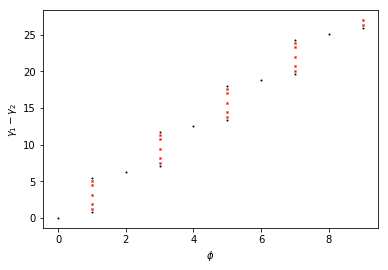

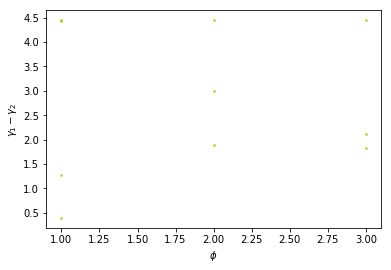

In [59]:
deltal  = 0
phi = 2
eta = 0.15
i = 0.5

alpha = 0.15

bgàhplt.figure(1)

for coef in range(0,100,1):

    phi = coef

    ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha,8,size = 10000.0)
    
    for npointfixe in range(len(ptFixeX1)):
        if  max(eingvalue1[npointfixe,:]) < 0:
            plt.figure(1)
            plt.plot(phi,ptFixeX1[npointfixe],'k.',markersize=2)
        else:
            plt.figure(1)
            plt.plot(phi,ptFixeX1[npointfixe],'rx',markersize=2)
    
    for npointfixe2 in range(len(ptFixeX2)):
        if  max(eingvalue2[npointfixe2,:]) < 0:
            plt.figure(2)
            plt.plot(phi,ptFixeX2[npointfixe2],'b.',markersize=2)
        else:
            plt.figure(2)
            plt.plot(phi,ptFixeX2[npointfixe2],'yx',markersize=2)
            
            
plt.figure(1)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\phi$')
#plt.axis([0,20,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$; $i = 0.5$; $\alpha = 0.15$')
plt.savefig('xvsPhi_test.pdf')

plt.figure(2)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\phi$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$; $i = 0.5$; $\alpha = 0.15$')
plt.savefig('xvsPhi_test2.pdf')

plt.figure(3)
plt.xlabel(r'$\phi$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.title(r'Fixed points as a function of $\phi$ for $\varepsilon = 0.15$; $i = 0.5$; $\alpha = 0.15$')
plt.savefig('xvsPhi_test2.pdf')



plt.show()

/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/asneto/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


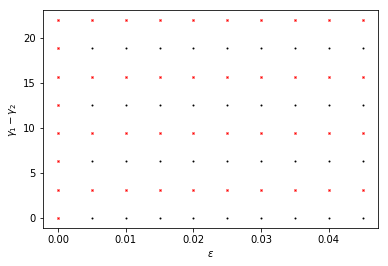

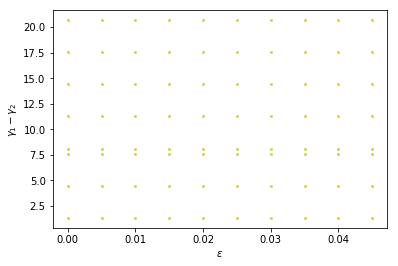

In [74]:
deltal  = 0
phi = 0
eta = 0.15
i = 0.5

alpha = 0.0

plt.figure(1)

for coef in range(0,10,1):

    eta = coef/200.0

    ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha,8,size = 10000.0)
    
    for npointfixe in range(len(ptFixeX1)):
        if  max(eingvalue1[npointfixe,:]) < 0:
            plt.figure(1)
            plt.plot(eta,ptFixeX1[npointfixe],'k.',markersize=2)
        else:
            plt.figure(1)
            plt.plot(eta,ptFixeX1[npointfixe],'rx',markersize=2)
    
    for npointfixe2 in range(len(ptFixeX2)):
        if  max(eingvalue2[npointfixe2,:]) < 0:
            plt.figure(2)
            plt.plot(eta,ptFixeX2[npointfixe2],'g.',markersize=2)
        else:
            plt.figure(2)
            plt.plot(eta,ptFixeX2[npointfixe2],'yx',markersize=2)

plt.figure(1)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\varepsilon$')
#plt.axis([0,20,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.savefig('xvsEta_test.pdf')

plt.figure(2)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$\varepsilon$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.savefig('xvsEta_test2.pdf')



plt.show()

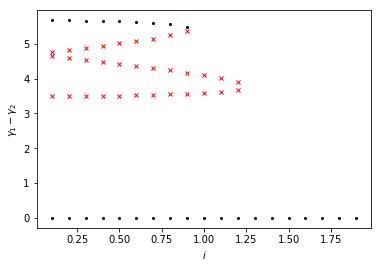

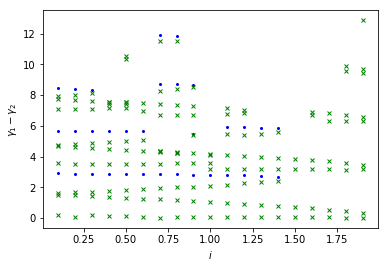

In [29]:
deltal  = 0
phi = 0
eta = 0.15
i = 0.5

alpha = 0.05

plt.figure(1)

for coef in range(1,50,1):

    i = coef/10.0

    ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha,8,size = 10000.0)
    
    for npointfixe in range(len(ptFixeX1)):
        if  max(eingvalue1[npointfixe,:]) < 0:
            plt.figure(1)
            plt.plot(i,ptFixeX1[npointfixe],'k.',markersize=4)
        else:
            plt.figure(1)
            plt.plot(i,ptFixeX1[npointfixe],'rx',markersize=4)
    
    for npointfixe2 in range(len(ptFixeX2)):
        if  max(eingvalue2[npointfixe2,:]) < 0:
            plt.figure(2)
            plt.plot(i,ptFixeX2[npointfixe2],'b.',markersize=4)
        else:
            plt.figure(2)
            plt.plot(i,ptFixeX2[npointfixe2],'gx',markersize=4)

plt.figure(1)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$i$')
#plt.axis([0,20,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.savefig('xvsi_test.pdf')

plt.figure(2)
#plt.plot(np.zeros((1,20))[0,:],np.arange(20),'k')
plt.xlabel(r'$i$')
#plt.axis([0,10,0,40])
plt.ylabel(r'$\gamma_1 - \gamma_2$')
plt.savefig('xvsi_test2.pdf')



plt.show()

In [88]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [19]:
x = np.linspace(0,2*np.pi,10000)

print(x)

[  0.00000000e+00   6.28381369e-04   1.25676274e-03 ...,   6.28192854e+00
   6.28255693e+00   6.28318531e+00]
